

# Predict the CO2 Emission using Regression


## Objectives

* Main objective of this project is to Predict the CO2 Emission based on some attributes
* Data is downloaded from the Kaggle open source platform
* Supervised Algorithm is used to predict the Outcome


### Importing Needed packages


In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
%matplotlib inline

### Importing Data

Data has been imported from the personel laptop using Pandas Library
Take a look of a data for better understanding of the dataset


In [2]:
df = pd.read_csv("D:\ML\FuelConsumptionCo2.csv")

df.head()



,MODELYEAR,MAKE,MODEL,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
0,2014,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,2014,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,2014,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,2014,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,2014,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244


In [3]:
df.tail()

,MODELYEAR,MAKE,MODEL,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
1062,2014,VOLVO,XC60 AWD,SUV - SMALL,3.0,6,AS6,X,13.4,9.8,11.8,24,271
1063,2014,VOLVO,XC60 AWD,SUV - SMALL,3.2,6,AS6,X,13.2,9.5,11.5,25,264
1064,2014,VOLVO,XC70 AWD,SUV - SMALL,3.0,6,AS6,X,13.4,9.8,11.8,24,271
1065,2014,VOLVO,XC70 AWD,SUV - SMALL,3.2,6,AS6,X,12.9,9.3,11.3,25,260
1066,2014,VOLVO,XC90 AWD,SUV - STANDARD,3.2,6,AS6,X,14.9,10.2,12.8,22,294


## Understanding the Data

### `FuelConsumptionCo2.csv`:

**`FuelConsumptionCo2.csv`**, which contains model-specific fuel consumption ratings and estimated carbon dioxide emissions for new light-duty vehicles for retail sale in Canada.

*   **MODELYEAR** e.g. 2014
*   **MAKE** e.g. Volvo
*   **MODEL** e.g. MDX 4WD
*   **VEHICLE CLASS** e.g. SUV
*   **ENGINE SIZE** e.g. 4.7
*   **CYLINDERS** e.g 6
*   **TRANSMISSION** e.g. A6
*   **FUEL CONSUMPTION in CITY(L/100 km)** e.g. 9.9
*   **FUEL CONSUMPTION in HWY (L/100 km)** e.g. 8.9
*   **FUEL CONSUMPTION COMB (L/100 km)** e.g. 9.2
*   **CO2 EMISSIONS (g/km)** e.g. 182


### Perform Exploratary Data Analysis


In [4]:
df.shape

(1067, 13)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1067 entries, 0 to 1066
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   MODELYEAR                 1067 non-null   int64  
 1   MAKE                      1067 non-null   object 
 2   MODEL                     1067 non-null   object 
 3   VEHICLECLASS              1067 non-null   object 
 4   ENGINESIZE                1067 non-null   float64
 5   CYLINDERS                 1067 non-null   int64  
 6   TRANSMISSION              1067 non-null   object 
 7   FUELTYPE                  1067 non-null   object 
 8   FUELCONSUMPTION_CITY      1067 non-null   float64
 9   FUELCONSUMPTION_HWY       1067 non-null   float64
 10  FUELCONSUMPTION_COMB      1067 non-null   float64
 11  FUELCONSUMPTION_COMB_MPG  1067 non-null   int64  
 12  CO2EMISSIONS              1067 non-null   int64  
dtypes: float64(4), int64(4), object(5)
memory usage: 108.5+ KB


In [6]:
# summarize the data
df.describe()

,MODELYEAR,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
count,1067.0,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000
mean,2014.0,3.346298,5.794752,13.296532,9.474602,11.580881,26.441425,256.228679
std,0.0,1.415895,1.797447,4.101253,2.794510,3.485595,7.468702,63.372304
min,2014.0,1.000000,3.000000,4.600000,4.900000,4.700000,11.000000,108.000000
25%,2014.0,2.000000,4.000000,10.250000,7.500000,9.000000,21.000000,207.000000
50%,2014.0,3.400000,6.000000,12.600000,8.800000,10.900000,26.000000,251.000000
75%,2014.0,4.300000,8.000000,15.550000,10.850000,13.350000,31.000000,294.000000
max,2014.0,8.400000,12.000000,30.200000,20.500000,25.800000,60.000000,488.000000


In [7]:
df[df.duplicated()]

,MODELYEAR,MAKE,MODEL,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS


In [8]:
df.isna().sum()

MODELYEAR                   0
MAKE                        0
MODEL                       0
VEHICLECLASS                0
ENGINESIZE                  0
CYLINDERS                   0
TRANSMISSION                0
FUELTYPE                    0
FUELCONSUMPTION_CITY        0
FUELCONSUMPTION_HWY         0
FUELCONSUMPTION_COMB        0
FUELCONSUMPTION_COMB_MPG    0
CO2EMISSIONS                0
dtype: int64

Let's select some features to explore more.
As some features are self defined which can affect the **CO2 Emission**. So let's study only those features which can have some impact on the emission.

In [9]:
cdf = df[['ENGINESIZE','CYLINDERS','FUELCONSUMPTION_COMB','CO2EMISSIONS']]
cdf.head()

,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_COMB,CO2EMISSIONS
0,2.0,4,8.5,196
1,2.4,4,9.6,221
2,1.5,4,5.9,136
3,3.5,6,11.1,255
4,3.5,6,10.6,244


Lets find the correaltion between these features

In [10]:
correlation = cdf.corr()
correlation

,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_COMB,CO2EMISSIONS
ENGINESIZE,1.000000,0.934011,0.819482,0.874154
CYLINDERS,0.934011,1.000000,0.776788,0.849685
FUELCONSUMPTION_COMB,0.819482,0.776788,1.000000,0.892129
CO2EMISSIONS,0.874154,0.849685,0.892129,1.000000


In [11]:
matrix = np.triu(correlation)
matrix

array([[1.        , 0.93401053, 0.81948214, 0.87415437],
       [0.        , 1.        , 0.77678782, 0.84968459],
       [0.        , 0.        , 1.        , 0.89212859],
       [0.        , 0.        , 0.        , 1.        ]])

So, from the above table we can see the correlation ##**coefficicent value is > 0.8** 
for each features. It means all the selected features strongly correlated with **CO2 Emission**


**Lets Draw a heatmap**

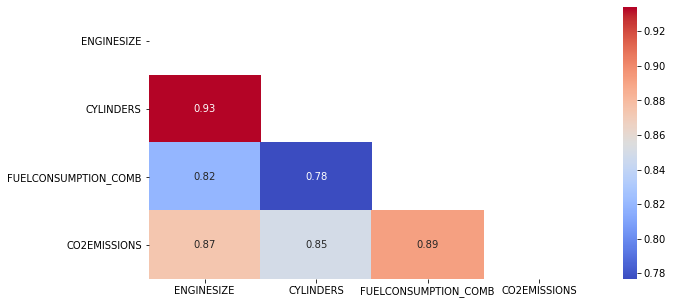

In [12]:
import seaborn as sns
plt.figure(figsize = (10,5))
sns.heatmap(correlation, xticklabels = cdf.columns, yticklabels = cdf.columns, annot = True, cmap = 'coolwarm', mask = matrix)
plt.show()

Let's plot the selected feature's histograms to see the distribution of the values of each feature


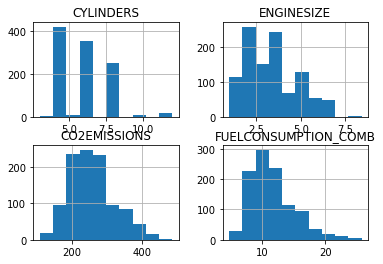

In [13]:
viz = cdf[['CYLINDERS','ENGINESIZE','CO2EMISSIONS','FUELCONSUMPTION_COMB']]
viz.hist()
plt.show()

Now, let's plot each of these features against the Emission, to see how relationship with the **CO2 Emission**


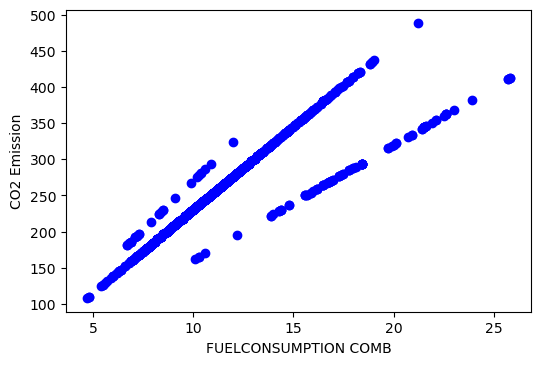

In [14]:
plt.figure(dpi= 100)
plt.scatter(cdf.FUELCONSUMPTION_COMB, cdf.CO2EMISSIONS,  color='blue')
plt.xlabel("FUELCONSUMPTION COMB")
plt.ylabel("CO2 Emission")
plt.show()

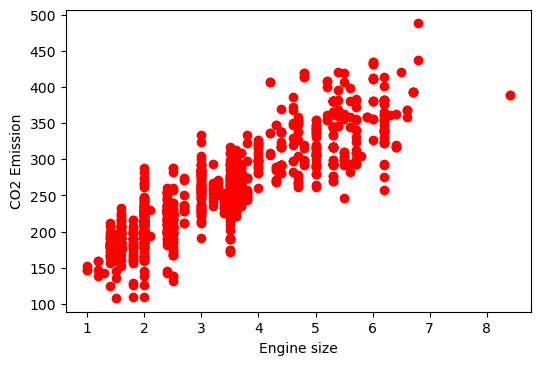

In [15]:
plt.figure(dpi= 100)
plt.scatter(cdf.ENGINESIZE, cdf.CO2EMISSIONS,  color='red')
plt.xlabel("Engine size")
plt.ylabel("CO2 Emission")
plt.show()

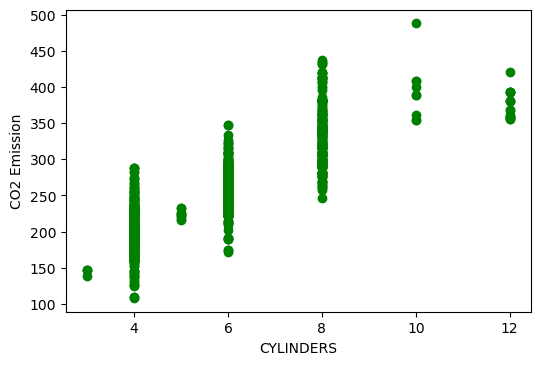

In [16]:
plt.figure(dpi= 100)
plt.scatter(cdf.CYLINDERS, cdf.CO2EMISSIONS,  color='green')
plt.xlabel("CYLINDERS")
plt.ylabel("CO2 Emission")
plt.show()

#### Creating train and test dataset

Train/Test Split involves splitting the dataset into training and testing sets that are mutually exclusive. After which, you train with the training set and test with the testing set.
This will provide a more accurate evaluation on out-of-sample accuracy because the testing dataset is not part of the dataset that have been used to train the model. Therefore, it gives us a better understanding of how well our model generalizes on new data.

This means that we know the outcome of each data point in the testing dataset, making it great to test with! Since this data has not been used to train the model, the model has no knowledge of the outcome of these data points. So, in essence, it is truly an out-of-sample testing.

Let's split whole data set into train and test data set.
**test data = 20% of entire data**

In [110]:
msk = np.random.rand(len(cdf)) < 0.8
train_data = cdf[msk]
test_data = cdf[~msk]

Let's plot the relation plot between **Engine Size and CO2 Emission**

<Figure size 1200x800 with 0 Axes>

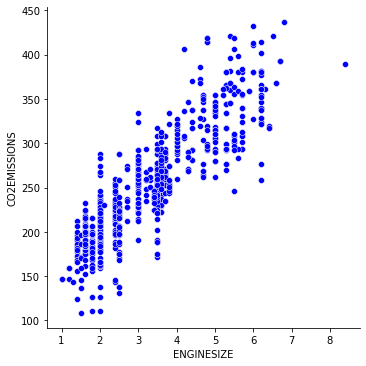

In [111]:
import seaborn as sns
plt.figure(dpi = 200)
sns.relplot(data = train_data, x="ENGINESIZE", y="CO2EMISSIONS", color = "b")
plt.show()

Now, let's see the effect of each feature to the target one by one

#### Train data distribution
#### Engine Size vs CO2 Emission

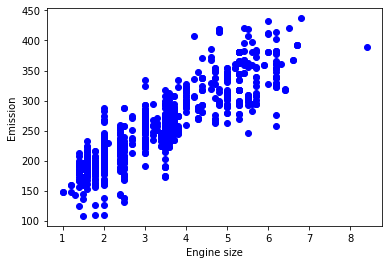

In [112]:
plt.scatter(train_data.ENGINESIZE, train_data.CO2EMISSIONS,  color='blue')
plt.xlabel("Engine size")
plt.ylabel("Emission")
plt.show()

#### Modeling

Using sklearn package linear_model lets trained our model and predict the CO2 Emission.

#### Simple Regression Model

Linear Regression fits a linear model with coefficients B = (B1, ..., Bn) to minimize the 'residual sum of squares' between the actual value y in the dataset, and the predicted value using linear approximation.


In [113]:
from sklearn import linear_model
regr = linear_model.LinearRegression()
train_x = np.asanyarray(train_data[['ENGINESIZE']])
train_y = np.asanyarray(train_data[['CO2EMISSIONS']])
regr.fit(train_x, train_y)
# The coefficients
print ('Coefficients: ', regr.coef_[0][0])
print ('Intercept: ',regr.intercept_[0])

Coefficients:  38.83213177756261
Intercept:  125.92781335477903


As mentioned before, **Coefficient** and **Intercept** in the simple linear regression, are the parameters of the fit line.
Given that it is a simple linear regression, with only 2 parameters, and knowing that the parameters are the intercept and slope of the line, sklearn can estimate them directly from our data.
Notice that all of the data must be available to traverse and calculate the parameters.


#### Plot outputs


We can plot the fit line over the data:


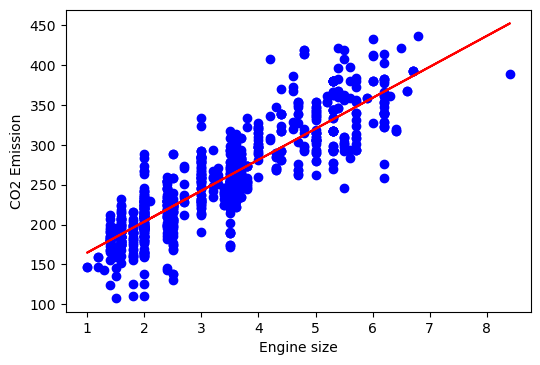

In [114]:
plt.figure(dpi=100)
plt.scatter(train_data.ENGINESIZE, train_data.CO2EMISSIONS,  color='blue')
plt.plot(train_x, regr.coef_[0][0]*train_x + regr.intercept_[0], '-r')
plt.xlabel("Engine size")
plt.ylabel("CO2 Emission")
plt.show()

#### Evaluation

We compare the actual values and predicted values to calculate the accuracy of a regression model. Evaluation metrics provide a key role in the development of a model, as it provides insight to areas that require improvement.

There are different model evaluation metrics, lets use MSE here to calculate the accuracy of our model based on the test set:

*   Mean Absolute Error: It is the mean of the absolute value of the errors. This is the easiest of the metrics to understand since it’s just average error.

*   Mean Squared Error (MSE): Mean Squared Error (MSE) is the mean of the squared error. It’s more popular than Mean Absolute Error because the focus is geared more towards large errors. This is due to the squared term exponentially increasing larger errors in comparison to smaller ones.

*   Root Mean Squared Error (RMSE).

*   R-squared is not an error, but rather a popular metric to measure the performance of your regression model. It represents how close the data points are to the fitted regression line. The higher the R-squared value, the better the model fits your data. The best possible score is 1.0 and it can be negative (because the model can be arbitrarily worse).

**Let's find the r squared score to check the performance of our model**
*  We will use r2_score module from the sklearn.metrics class

In [115]:
from sklearn.metrics import r2_score

test_x = np.asanyarray(test_data[['ENGINESIZE']])
test_y = np.asanyarray(test_data[['CO2EMISSIONS']])
test_y_ = regr.predict(test_x)

**Calculate MAE, RSS(MSE) and R2 Score**

In [116]:
MAE_ES = np.mean(np.absolute(test_y_ - test_y))
RSS_ES = np.mean((test_y_ - test_y)**2)
R2_Score_ES = r2_score(test_y,test_y_)

In [117]:
print(f"MAE : %.2f"%np.mean(np.absolute(test_y_ - test_y)))
print(f"MSE: %.2f"%np.mean((test_y_ - test_y)**2))
print(f"R2 Score : %.2f"%r2_score(test_y,test_y_))

MAE : 23.07
MSE: 990.01
R2 Score : 0.77


In [118]:
df_ES = pd.DataFrame({
    "MAE": "%.2f"% MAE_ES,
    "RSS": "%.2f"% RSS_ES,
    "R2_Score": "%.2f"% R2_Score_ES
}, index = ["Engine Size"])
df_ES

,MAE,RSS,R2_Score
Engine Size,23.07,990.01,0.77


As we have calculated the MAE, MSE and R2 Score for the model. Based on R2 Score we can say that our model is quite good.
But let's see the effect of two other features on CO2 Emission.

## FUELCONSUMTION_COMB VS CO2EMISSION


Lets see what the evaluation metrics are if we trained a regression model using the `FUELCONSUMPTION_COMB` feature.

Start by selecting `FUELCONSUMPTION_COMB` as the train_x data from the `train` dataframe, then select `FUELCONSUMPTION_COMB` as the test_x data from the `test` dataframe


In [119]:
train_x = train_data[["FUELCONSUMPTION_COMB"]]
test_x = test_data[["FUELCONSUMPTION_COMB"]]
train_y = train_data[["CO2EMISSIONS"]]
test_y= test_data[["CO2EMISSIONS"]]

In [120]:
regr = linear_model.LinearRegression()
regr.fit(train_x, train_y)


LinearRegression()

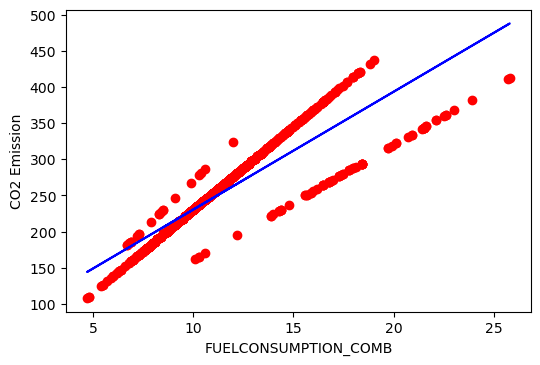

In [121]:
plt.figure(dpi=100)
plt.scatter(train_data.FUELCONSUMPTION_COMB, train_data.CO2EMISSIONS,  color='red')
plt.plot(train_x, regr.coef_[0][0]*train_x + regr.intercept_[0], '-b')
plt.xlabel("FUELCONSUMPTION_COMB")
plt.ylabel("CO2 Emission")
plt.show()

Find the predictions using the model's `predict` function and the `test_x` data


In [122]:
test_y_ = regr.predict(test_x)

Finally use the `predictions` and the `test_y` data and find the Mean Absolute Error value using the `np.absolute` and `np.mean` function like done previously


In [123]:
print(f"MAE : %.2f"%np.mean(np.absolute(test_y_ - test_y)))
print(f"MSE: %.2f"%np.mean((test_y_ - test_y)**2))
print(f"R2 Score : %.2f"%r2_score(test_y,test_y_))

MAE : 19.97
MSE: 826.90
R2 Score : 0.81


In [124]:
df_FC = pd.DataFrame({
    "MAE": "%.2f"% np.mean(np.absolute(test_y_ - test_y)),
    "RSS": "%.2f"% np.mean((test_y_ - test_y)**2),
    "R2_Score": "%.2f"% r2_score(test_y,test_y_)
}, index = ["Fuel Consumption"])
df_FC

,MAE,RSS,R2_Score
Fuel Consumption,19.97,826.90,0.81


We can see that the MAE is much worse when we train using `ENGINESIZE` than `FUELCONSUMPTION_COMB`


## CYLINDERS VS CO2EMISSION


Lets see what the evaluation metrics are if we trained a regression model using the `CYLINDERS` feature.

Start by selecting `CYLINDERS` as the train_x data from the `train` dataframe, then select `CYLINDERS` as the test_x data from the `test` dataframe

In [125]:
train_x = train_data[["CYLINDERS"]]
test_x = test_data[["CYLINDERS"]]
train_y = train_data[["CO2EMISSIONS"]]
test_y= test_data[["CO2EMISSIONS"]]

In [126]:
regr = linear_model.LinearRegression()
regr.fit(train_x, train_y)


LinearRegression()

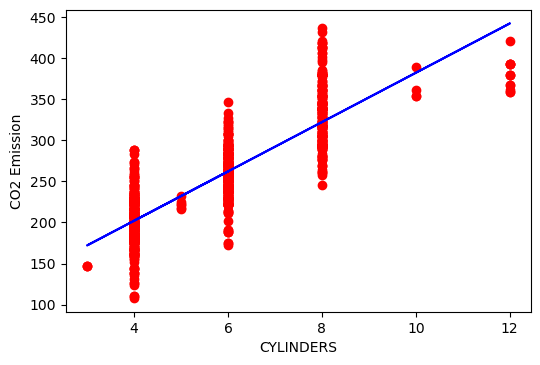

In [127]:
plt.figure(dpi=100)
plt.scatter(train_data.CYLINDERS, train_data.CO2EMISSIONS,  color='red')
plt.plot(train_x, regr.coef_[0][0]*train_x + regr.intercept_[0], '-b')
plt.xlabel("CYLINDERS")
plt.ylabel("CO2 Emission")
plt.show()

In [128]:
test_y_ = regr.predict(test_x)
print(f"MAE : %.2f"%np.mean(np.absolute(test_y_ - test_y)))
print(f"MSE: %.2f"%np.mean((test_y_ - test_y)**2))
print(f"R2 Score : %.2f"%r2_score(test_y,test_y_))

MAE : 25.66
MSE: 1192.49
R2 Score : 0.72


In [129]:
df_CY = pd.DataFrame({
    "MAE": "%.2f"% np.mean(np.absolute(test_y_ - test_y)),
    "RSS": "%.2f"% np.mean((test_y_ - test_y)**2),
    "R2_Score": "%.2f"% r2_score(test_y,test_y_)
}, index = ["Cylinders"])
df_CY

,MAE,RSS,R2_Score
Cylinders,25.66,1192.49,0.72


**We have examined the relatonship of each and parameter on CO2 emission, now it's time to check the all the parameters effect on CO2 emission as whole. For that we will use multiple linear regression model.**

# Multiple Regression Model

As multiple linear regression is an extension of simple linear regression. We will be using more than one parameters to predict the CO2 emission value.
**Parameters : Engine Size, Fuel Consumption and Cylinders**

**Split in train and test data set**

In [130]:
train_x = train_data[['ENGINESIZE','CYLINDERS','FUELCONSUMPTION_COMB']]
train_y = train_data[["CO2EMISSIONS"]]
test_x = test_data[['ENGINESIZE','CYLINDERS','FUELCONSUMPTION_COMB']]
test_y = test_data[["CO2EMISSIONS"]]

**Fit the model**

In [131]:
from sklearn import linear_model
regr = linear_model.LinearRegression()
regr.fit(train_x, train_y)

LinearRegression()

**Get the regression coefficients and intercept**

In [132]:
print(f"Coffecients of reg: {regr.coef_}\nIntercept: {regr.intercept_}")

Coffecients of reg: [[10.7907741   7.53700245  9.62578784]]
Intercept: [64.81906175]


**Predict the O/P**

In [133]:
test_y_ = regr.predict(test_x)

**Calculate Residual Sum of Sqaures and R2 Score value**

In [134]:
print(f"MAE : %.2f"%np.mean(np.absolute(test_y_ - test_y)))
print(f"MSE: %.2f"%np.mean((test_y_ - test_y)**2))
print(f"R2 Score : %.2f"%r2_score(test_y,test_y_))

MAE : 16.53
MSE: 530.73
R2 Score : 0.88


In [135]:
df_MUL = pd.DataFrame({
    "MAE": "%.2f"% np.mean(np.absolute(test_y_ - test_y)),
    "RSS": "%.2f"% np.mean((test_y_ - test_y)**2),
    "R2_Score": "%.2f"% r2_score(test_y,test_y_)
}, index = ["All Parameters"])
df_MUL

,MAE,RSS,R2_Score
All Parameters,16.53,530.73,0.88


In [138]:
df_ALL = df_ES.append(df_FC).append(df_CY).append(df_MUL)
df_ALL

,MAE,RSS,R2_Score
Engine Size,23.07,990.01,0.77
Fuel Consumption,19.97,826.90,0.81
Cylinders,25.66,1192.49,0.72
All Parameters,16.53,530.73,0.88


**As clearly see in df_ALL data frame, MSE and RSS values are the lowest for multiple linear regression compare to simple linear regression on CO2 emission. R2 Score values is also highest for multiple regression. 
It seems like multiple linear regression is is perfect fit for the prediction of CO2 emmision on a different vehicles.**

**Now let's see the how predicted and actual values are distributed...**

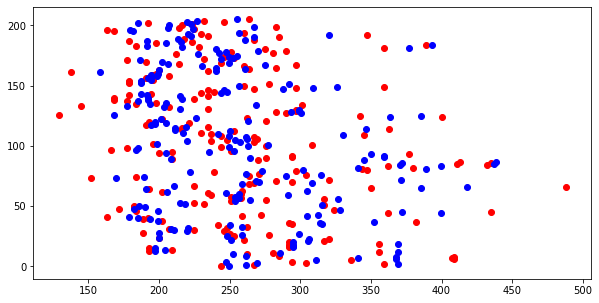

In [177]:
plt.figure(figsize = (10,5))
predict_co2 = [ele[0] for ele in test_y_]
plt.scatter(test_y, range(0, len(test_y)), color = "r")
plt.scatter(predict_co2, range(0, len(test_y)), color = "b")
plt.show()